In [16]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

print("all files imported successfully")
        

all files imported successfully


In [18]:
    
%matplotlib inline
np.set_printoptions(suppress=True)
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)
print(newsgroups_train.filenames.shape)
print("task completed")



(2034,)
task completed


In [20]:
print("\n".join(newsgroups_train.data[:3]))
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]
newsgroups_train.target[:10]

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

In [22]:
from sklearn.feature_extraction import stop_words

sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
from nltk import stem

wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()
word_list = ['fly', 'flies', 'flying']
[wnl.lemmatize(word) for word in word_list]


['fly', 'fly', 'flying']

In [25]:
import spacy

from spacy.lemmatizer import Lemmatizer
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.Defaults.create_lemmatizer()
print([lemmatizer.lookup(word) for word in word_list])

sorted(list(nlp.Defaults.stop_words))[:20]


['fly', 'flies', 'flying']


["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
vectorizer = CountVectorizer(stop_words='english') #, tokenizer=LemmaTokenizer())

vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape 
vocab = np.array(vectorizer.get_feature_names())
vocab.shape#, vectors.nnz / vectors.shape[0], row_means.shape
vocab[7020:7040]

array(['countdown', 'counted', 'counter', 'counter_clockwise',
       'counterargument', 'counterclockwise', 'countered',
       'counterexamples', 'counterfactual', 'counterpart',
       'counterproductive', 'counters', 'counting', 'countless',
       'countries', 'country', 'countryside', 'counts', 'county', 'coup'],
      dtype='<U80')

Wall time: 21.1 s
(2034, 2034) (2034,) (2034, 26576)


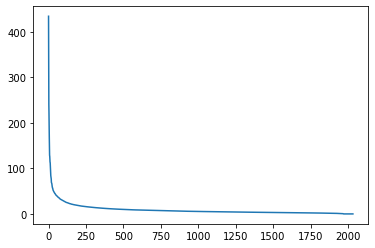

In [61]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)
print(U.shape, s.shape, Vh.shape)
plt.plot(s)

In [62]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']